In [1]:
import pandas as pd
import numpy as np

/var/folders/gf/w0jtkzbx3k5cxhhbjjkvys5c0000gn/T/ipykernel_2434/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

2024-02-12 11:45:41.706063: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
class AppleStockPrediction:
    def __init__(self, file):
        self.file = file
        self.dataFrame = None

    def importData(self):
        self.dataFrame = pd.read_csv(self.file, parse_dates=['Date'], index_col='Date')
    
    def manipulateData(self):
        headers = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
        data = self.dataFrame[headers]
        return data
    
    # use data from February 2019, to Decemeber 30, 2022 so that we can train the model with this dataset
    # and test our model with the test dataset
    def defineTrainData(self):
        data = self.manipulateData()
        define_x_train_data = data.loc['2019-02-12':'2022-12-30']
        return define_x_train_data
    
    # use test data from January 3, 2023 to February 9, 2024 so that we can test our model weather our model is 
    # performing well or not
    def defineTestData(self):
        data = self.manipulateData()
        define_x_test_data = data.loc['2023-01-03':'2024-02-09']
        return define_x_test_data
    
    def normalizeTrainData(self):
        normalize = MinMaxScaler()
        train_data = self.defineTrainData()
        normalizeTrainData = normalize.fit_transform(train_data)
        return normalizeTrainData
    
    def normalizeTestData(self):
        normalizeScaler = MinMaxScaler()
        test_data = self.defineTestData()
        normalizeTestData = normalizeScaler.fit_transform(test_data)
        return normalizeTestData, normalizeScaler
    
    def inputOutputTrainData(self):
        normalizedTrainData = self.normalizeTrainData()
        X_train = normalizedTrainData[:, :-1]
        y_train = normalizedTrainData[:, -1]
        return X_train, y_train
    
    def inputOutputTestData(self):
        normalizedTestData, normalizeScaler = self.normalizeTestData()
        X_test = normalizedTestData[:, :-1]
        y_test = normalizedTestData[:, -1]
        return X_test, y_test, normalizeScaler
    
    def BuildAndTrainModel(self):
        X_train, y_train = self.inputOutputTrainData()
        X_test, y_test, normalizeScaler = self.inputOutputTestData()
        X_test_data = self.defineTestData()
        model = Sequential()
        model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(1, activation='linear'))

        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
        
        predictions_scaled = model.predict(X_test)

        meanSquaredError = mean_squared_error(y_test, predictions_scaled)
        print(f"Mean Squared Error is {meanSquaredError}")
        predictions_original_scale = normalizeScaler.inverse_transform(np.concatenate([X_test, predictions_scaled], axis=1))[:, -1]

        # Visualize predictions
        plt.figure("Apple Inc Stock Market Prediction")
        plt.plot(X_test_data.index, predictions_original_scale, label='Predicted Volume')
        plt.plot(X_test_data.index, X_test_data['Volume'], label='Actual Volume')
        plt.legend()
        plt.show()

Epoch 1/50
31/31 [==============================] - 1s 6ms/step - loss: 0.0284 - val_loss: 0.0268
Epoch 2/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0243
Epoch 3/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0331
Epoch 4/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0278
Epoch 5/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0262
Epoch 6/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0293
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0262
Epoch 8/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.0235
Epoch 9/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.0226
Epoch 10/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.0266
Epoch 11/50
31/31 [

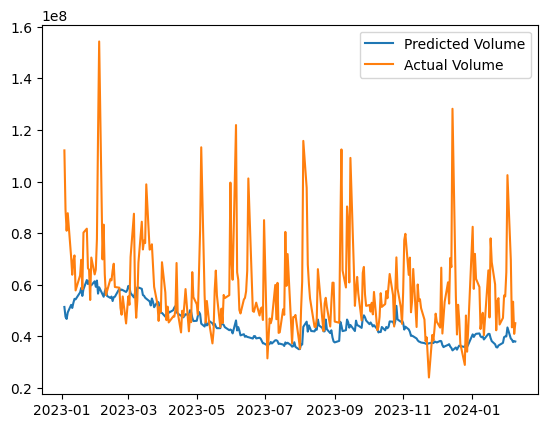

In [5]:
Apple_Inc_path = '/Users/eyosiasdesta/AIProjects/StockMarketPrediction/StockMarketPrediction/AAPL.csv'
apple_stock = AppleStockPrediction(Apple_Inc_path)
apple_stock.importData()
apple_stock.BuildAndTrainModel()